# Loss analysis for the mobile app 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assess-data-and-data-preparation" data-toc-modified-id="Assess-data-and-data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assess data and data preparation</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#The-functions-to-calculate-and-analyze-LTV,-ROI,-retention-and-conversion" data-toc-modified-id="The-functions-to-calculate-and-analyze-LTV,-ROI,-retention-and-conversion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The functions to calculate and analyze LTV, ROI, retention and conversion</a></span><ul class="toc-item"><li><span><a href="#The-function-for-creating-user-profiles" data-toc-modified-id="The-function-for-creating-user-profiles-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The function for creating user profiles</a></span></li><li><span><a href="#The-function-to-calculate-users-retention" data-toc-modified-id="The-function-to-calculate-users-retention-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The function to calculate users retention</a></span></li><li><span><a href="#The-function-to-calculate-conversion" data-toc-modified-id="The-function-to-calculate-conversion-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>The function to calculate conversion</a></span></li><li><span><a href="#The-function-to-calculte-LTV-and-ROI" data-toc-modified-id="The-function-to-calculte-LTV-and-ROI-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>The function to calculte LTV and ROI</a></span></li><li><span><a href="#Function-for-smoothing-the-frame" data-toc-modified-id="Function-for-smoothing-the-frame-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Function for smoothing the frame</a></span></li><li><span><a href="#Function-for-visualizing-retention" data-toc-modified-id="Function-for-visualizing-retention-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Function for visualizing retention</a></span></li><li><span><a href="#Conversion-visualization-function" data-toc-modified-id="Conversion-visualization-function-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Conversion visualization function</a></span></li><li><span><a href="#The-function-for-LTV-and-ROI-visualization" data-toc-modified-id="The-function-for-LTV-and-ROI-visualization-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>The function for LTV and ROI visualization</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Marketing" data-toc-modified-id="Marketing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Marketing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Analysis-of-the-total-return-on-advertisement-costs-for-the-users-acquisition" data-toc-modified-id="Analysis-of-the-total-return-on-advertisement-costs-for-the-users-acquisition-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis of the total return on advertisement costs for the users acquisition</a></span><ul class="toc-item"><li><span><a href="#Analysis-of-the-total-return-on-advertisement-costs" data-toc-modified-id="Analysis-of-the-total-return-on-advertisement-costs-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Analysis of the total return on advertisement costs</a></span></li><li><span><a href="#Analysis-of-the-return-on-advertisement-costs-by-countries" data-toc-modified-id="Analysis-of-the-return-on-advertisement-costs-by-countries-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Analysis of the return on advertisement costs by countries</a></span></li><li><span><a href="#Analysis-of-the-return-on-advertisement-costs-by-countries-by-devices" data-toc-modified-id="Analysis-of-the-return-on-advertisement-costs-by-countries-by-devices-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Analysis of the return on advertisement costs by countries by devices</a></span></li><li><span><a href="#Analysi-of-the-return-on-advertising-expences-by-channels" data-toc-modified-id="Analysi-of-the-return-on-advertising-expences-by-channels-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Analysi of the return on advertising expences by channels</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#The-reasons-of-inefficient-acquisition-campaign" data-toc-modified-id="The-reasons-of-inefficient-acquisition-campaign-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>The reasons of inefficient acquisition campaign</a></span></li><li><span><a href="#The-recomendations-to-the-marketing-department-to-increase-effiecincy" data-toc-modified-id="The-recomendations-to-the-marketing-department-to-increase-effiecincy-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>The recomendations to the marketing department to increase effiecincy</a></span></li></ul></li></ul></div>

## Assess data and data preparation

In [1]:
# import libraries

import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')


In [2]:
#function for the quick datset analysis

def dataset (dataset):
    dataset.columns = [x.lower().replace(' ', '_') for x in dataset.columns.values]
    print(dataset.info())
    print('\n')
    print(dataset.describe())
    print('\n')
    print('Missed data')
    print(dataset.isnull().sum())
    print('\n')
    print(dataset.head(5))
    print('\n')
    print('Duplicates quantity', dataset.duplicated().sum())
    
dataset(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None


            user_id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11


Missed data
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64


        user_id         region   device  channel        session_start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  27896590

In [3]:
dataset(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None


            user_id       revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000


Missed data
user_id     0
event_dt    0
revenue     0
dtype: int64


        user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  20

In [4]:
dataset(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None


             costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000


Missed data
dt         0
channel    0
costs      0
dtype: int64


           dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1


Duplicates quantity 0


In [5]:
visits['session_start'] = pd.to_datetime(visits['session_start']) # bring the data to datetime format
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [6]:
orders['event_dt'] = pd.to_datetime(orders['event_dt']) # bring the data to datetime format

In [7]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date # bring the data to datetime format

### Conclusion
We prepared data for the upcoming analysis by changing the format and checking the missing and duplicate values.

## The functions to calculate and analyze LTV, ROI, retention and conversion

Further we will define functions for creating user profiles, conversion, LTV, ROI and for visualizing these metrics — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

### The function for creating user profiles

In [8]:

def get_profiles(sessions, orders, ad_costs):

    # sort sessions by user ID and engagement date
    # grouping by id and finding the parametres of first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # giving the name for the first session as 'first_ts'
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # returning user_id from index
    )

    # defining the date of first visit for the cohort analysis
    # and the first day of month in which the first visit had place
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # adding an indicator of paying user
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # calculating the number if unique users
    # who have the same source and acquisition date
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # giving the name for the number of users as 'unique_users'
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # returning dt and channel from indexes
    )

    # uniting advertising costs and the number of acquired users
    # by date and acqusition channel
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # dividing the advertisiment costs by the number of acquired users
    # saving the calculation results into column acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # adding acquisition cost to the profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # as the users, attracted organically, are connected to the advertisiment costs
    # they have in the 'acquisition_cost' column 'NaN' values
    # so we can change these values for '0' as the acquisition cost is equal to zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # returning profiles with CAC

### The function to calculate users retention

In [9]:

def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # decide which columns we will leave for the retention grouping, the column of the sign of the paying user always remains
    dimensions = ['payer'] + dimensions
    
    # we cut off all users who could not "live" to the desired horizon
    # (joined later than observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # forming the raw data massive
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # function to make grouping by desired dimension
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # building "triangle table" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # defining the cohort sizes
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # combining the cohort sizes and triangle table
        result = result.div(result['cohort_size'], axis = 0)                                                     # divide every column by the cohort size - to calculate retention rate %
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # remain only the data before the analysis horizon and the column with the cohort size
        result['cohort_size'] = cohort_sizes                                                                     # redefining the cilumn with the cohorts sizes as in the previous step it became equal to '1'
        return result
    
    # calculating retention 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # calculating retention by all dimensions + date
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # returning retention table and raw data (so we remain possibility to return to the beginning of analysis in case of any problems)
    return result_raw, result_grouped, result_in_time

### The function to calculate conversion

In [10]:

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # excluding users outside of the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # defining the date and first purchase time for every single user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # adding purchasing data into profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculating lifetime value for every single purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # grouping by cohort, if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # function for grouping table by desired dimensions
    def group_by_dimensions(df, dims, horizon_days):
        # building "triangle" conversion table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # calculating cumulative amount for every line
        result = result.fillna(0).cumsum(axis = 1)
        # calculating cohort size
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # adding the cohort size to the conversion table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # dividing every 'cell' in a line by the cohort size
        # and getting the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # excluding all lifetimes after the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # recovering the cohort size
        result['cohort_size'] = cohort_sizes
        return result

    # getting the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for the dynamic of conversion table drop 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # getting the conversion dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # returning both tables and raw data
    return result_raw, result_grouped, result_in_time

### The function to calculte LTV and ROI

In [11]:

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # excluding users outside of the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # add data about ourchases to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculating users lifetime for every purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # group by cohort, if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # function for grouping table by desired dimensions
    def group_by_dimensions(df, dims, horizon_days):
        # building "triangle" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # calculating cumulative revenue amount
        result = result.fillna(0).cumsum(axis=1)
        # calculating cohort size
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # combine the cohort sizes and the revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # calculating LTV: divide each "cell" in a row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # exclude all liftimes exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # redefining cohort size
        result['cohort_size'] = cohort_sizes

        # saving user data and CAC values to the dataframe,
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculating average CAC by parametres from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculate ROI: ratio of LTV to CAC
        roi = result.div(cac['cac'], axis=0)

        # dropping lines with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # redefining cohort size in ROI table
        roi['cohort_size'] = cohort_sizes

        # adding CAC to the ROI table
        roi['cac'] = cac['cac']

        # in the final table we leave the cohort sizes, CAC
        # and ROI in lifetimes not exceeding the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # returning tables for LTV and ROI
        return result, roi

    # getting the tables for LTV and ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for tables with historical data excluding 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # getting the LTV and ROI dynamic tables
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamic table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamic table
    )

### Function for smoothing the frame

In [12]:

def filter_data(df, window):
    # application of an mooving average for every column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Function for visualizing retention

In [13]:
# function for visualizing retention

def plot_retention(retention, retention_history, horizon, window=14):

    # setting the grid size for graphs
    plt.figure(figsize=(15, 10))

    # excluding cohort sizes and retention of the first day
    retention = retention.drop(columns=['cohort_size', 0])
    # leaving only the necessary lifetime in the dynamics table
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if only payer is in the retention table indexes,
    # adding the second attribute — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the graph table — two columns and two rows, four cells
    # in the first one, we build retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Paying user retention')

    # construct retention curves for non-paying in the second cell
    # vertical axis — from the graph from the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Non-paying user retention')

    # the dynamics of paying retention is in the third cell
    ax3 = plt.subplot(2, 2, 3)
    # getting the column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filter data and build visualization
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition date')
    plt.title(
        'Paying user retention dynamics на {} day'.format(
            horizon
        )
    )

    # the dynamics of non-paying retention is in the fourth cell
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filter data and build visualization
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition date')
    plt.title(
        'User retention dynamics на {} day'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 


### Conversion visualization function

In [14]:
# conversion visualization function

def plot_conversion(conversion, conversion_history, horizon, window=14):

    # setting the grid size for charts
    plt.figure(figsize=(15, 5))

    # excluding cohort size
    conversion = conversion.drop(columns=['cohort_size'])
    # we leave only the necessary lifetime in the dynamics table
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # the first chart - conversion lines
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User conversion')

    # the first chart - conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # the columns of the pivot table will be all the columns of the index, except for the date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('User conversion dynamics на {} day'.format(horizon))

    plt.tight_layout()
    plt.show()

### The function for LTV and ROI visualization

In [15]:
# function for LTV and ROI visualization

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    plt.figure(figsize=(20, 10))

    # excluding from ltv table cohort size
    ltv = ltv.drop(columns=['cohort_size'])
    # saving in ltv dynamic table only relevant lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # save acqusition cost to the separate dataframe
    cac_history = roi_history[['cac']]

    # excluding from roi table cohort sizes and cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # saving in roi dynamic table only relevant lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # LTV curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # LTV dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # the columns of the pivot table will be all the columns of the index, except for the date
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('Users LTV dynamics for the {} day'.format(horizon))

    # CAC dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # the columns of the pivot table will be all the columns of the index, except for the date
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition date')
    plt.title('Acquistion cost dynamics')

    # ROI curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Breakeven level')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # ROI dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # the columns of the pivot table will be all the columns of the index, except for the date
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Acquisition date')
    plt.title('Users ROI dynamic for the {} day'.format(horizon))

    plt.tight_layout()
    plt.show()

## EDA

Let's define the last and the first date of users acquisition.

In [16]:
print(visits['session_start'].min())

2019-05-01 00:00:41


In [17]:
print(visits['session_start'].max())

2019-10-31 23:59:23


The analysis is carried out as of November 1, 2019, the data period corresponds to expectations - in the terms of the project it was said that the analysis is carried out for users attracted from May to October 27, 2019.

Let's build user profiles, immediately excluding users who came organically and are not subject of marketing costs.

In [18]:
profiles = get_profiles(visits, orders, costs)

# excluding organic traffic users
profiles = profiles.query('channel != "organic"')
profiles['dt'] = pd.to_datetime(profiles['dt'])

profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.900000
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.117838
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000


Let's define from which countries users are coming and what is the conversion to paying user in every specific country.

In [19]:
#function for calculating the shares and the number of paying customers by dimension

def payers_count (dimension):
    print(
    profiles.groupby(dimension)
    .agg({'payer':'sum'})
    .sort_values(by='payer', ascending=False)
    )
    with pd.option_context('display.float_format', '{:.2%}'.format):
        display(
        profiles.groupby(dimension)
        .agg({'payer':'mean'})
        .sort_values(by='payer', ascending=False)
        )

dimension = ['region']
payers_count(dimension=dimension)

               payer
region              
United States   6108
UK               569
France           554
Germany          490


,payer
region,
United States,9.88%
Germany,5.14%
UK,5.10%
France,5.01%


The highest conversion rate is for users which came from the US.

In [20]:
dimension = ['device']
payers_count(dimension=dimension)

         payer
device        
iPhone    2972
Android   1782
Mac       1673
PC        1294


,payer
device,
Mac,8.95%
iPhone,8.77%
Android,8.16%
PC,6.76%


The highest conversion rate is for users with IPhone device, the lowest conversion is observed on PC devices.

In [21]:
dimension = ['channel']
payers_count(dimension=dimension)

                    payer
channel                  
FaceBoom             3557
TipTop               1878
WahooNetBanner        453
AdNonSense            440
RocketSuperAds        352
LeapBob               262
OppleCreativeMedia    233
lambdaMediaAds        225
YRabbit               165
MediaTornado          156


,payer
channel,
FaceBoom,12.20%
AdNonSense,11.34%
lambdaMediaAds,10.47%
TipTop,9.60%
RocketSuperAds,7.91%
WahooNetBanner,5.30%
YRabbit,3.83%
MediaTornado,3.57%
LeapBob,3.06%


### Conclusion

1. The countries from which visitors come: USA, Great Britain, France and Germany. At the same time, most of the paying users come from the USA.

2. Users use the following devices: Mac, iPhone, Android, PC. Mac and iPhone users have the largest conversion.

3. Top 3 channels for acqusition of paying users: FaceBoom, AdNonSense, lambdaMediaAds - the conversion rate on each of these channels is more than 10%. At the same time, most new visitors come through the channels FaceBoom, TipTop, organic.

## Marketing

In [22]:
print('{:.0f}'.format(costs['costs'].sum()))

105497


The total spending on the advertising is $ 105,497. Let's calculate average CAC:

In [23]:
print('{:.2f}'.format(profiles['acquisition_cost'].mean()))

1.13


In [24]:
print('{:.2f}'.format(profiles['acquisition_cost'].median()))

1.08


Average CAC for the observing period is 1.13 USD, while the median one is 1.08 USD.

In [25]:
with pd.option_context('display.float_format', '{:.0f}'.format):
    display(costs.groupby('channel').agg(total_costs=('costs','sum')).sort_values(by='total_costs', ascending=False))

,total_costs
channel,
TipTop,54751
FaceBoom,32446
WahooNetBanner,5151
AdNonSense,3911
OppleCreativeMedia,2151
RocketSuperAds,1833
LeapBob,1798
lambdaMediaAds,1558
MediaTornado,954


Most of the money was spent on TipTop and FaceBoom. Taking into account the average cost of attraction, these are also the most expensive sources - the average cost of attracting customers through these channels is more than the median one:

In [26]:
with pd.option_context('display.float_format', '{:.2f}'.format):
    display(profiles.groupby('channel').agg(average_CAC =('acquisition_cost','mean')).sort_values(by='average_CAC', ascending=False))

,average_CAC
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


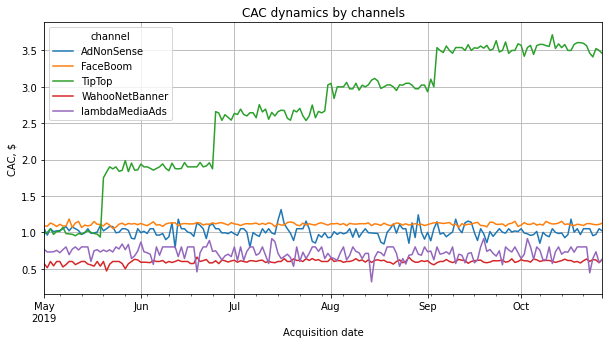

In [27]:
# creating CAC visualization for the five most expensive channels
top3channels = ['TipTop','FaceBoom', 'AdNonSense', 'lambdaMediaAds', 'WahooNetBanner']
profiles_top3channels = profiles.query('channel in @top3channels')

profiles_top3channels.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Acquisition date')
plt.title('CAC dynamics by channels')
plt.show()

The advertising budget for TipTop users increased every month until September - apparently, the company had a special strategy for this platform.

In [28]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]').dt.date
costs_by_month = costs.groupby('costs_month')['costs'].sum().reset_index()
costs_by_month

,costs_month,costs
0,2019-05-01,9978.570
1,2019-06-01,15090.045
2,2019-07-01,16447.060
3,2019-08-01,20657.870
4,2019-09-01,22441.340
5,2019-10-01,20882.415


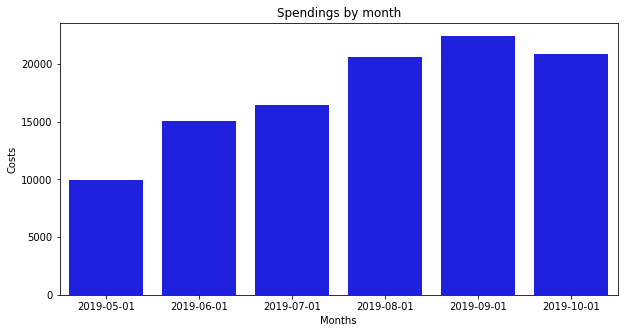

In [29]:
plt.figure(figsize = (10, 5))
ax = sns.barplot(x="costs_month", y="costs", color='blue', data=costs_by_month)
plt.title('Spendings by month')
ax.set_xlabel('Months')
ax.set_ylabel('Costs')
plt.show()

The maximum advertisement spent occured in September, October and August.

### Conclusion

The acquisition cost for the TipTop channel has been increasing gradually for the five months. The costs for this channel take more than a half of all advertising budget.

## Analysis of the total return on advertisement costs for the users acquisition

### Analysis of the total return on advertisement costs

The defining of the moment and horizon of data analysis is needed. According to the training case, the analysis is performing on the November 1st, 2019. We will set a two-week analysis horizon, because it is considered that payback should come no later than two weeks after the user acquisition.

In [30]:
observation_date = datetime(2019, 10, 31).date()  # moment of analysis
horizon_days = 14  # analysis horizon

For the beginning we will estimate the general return on advertisement costs. By using the functions get_ltv() and plot_ltv_roi(), we will calculate and visualize LTV and ROI.

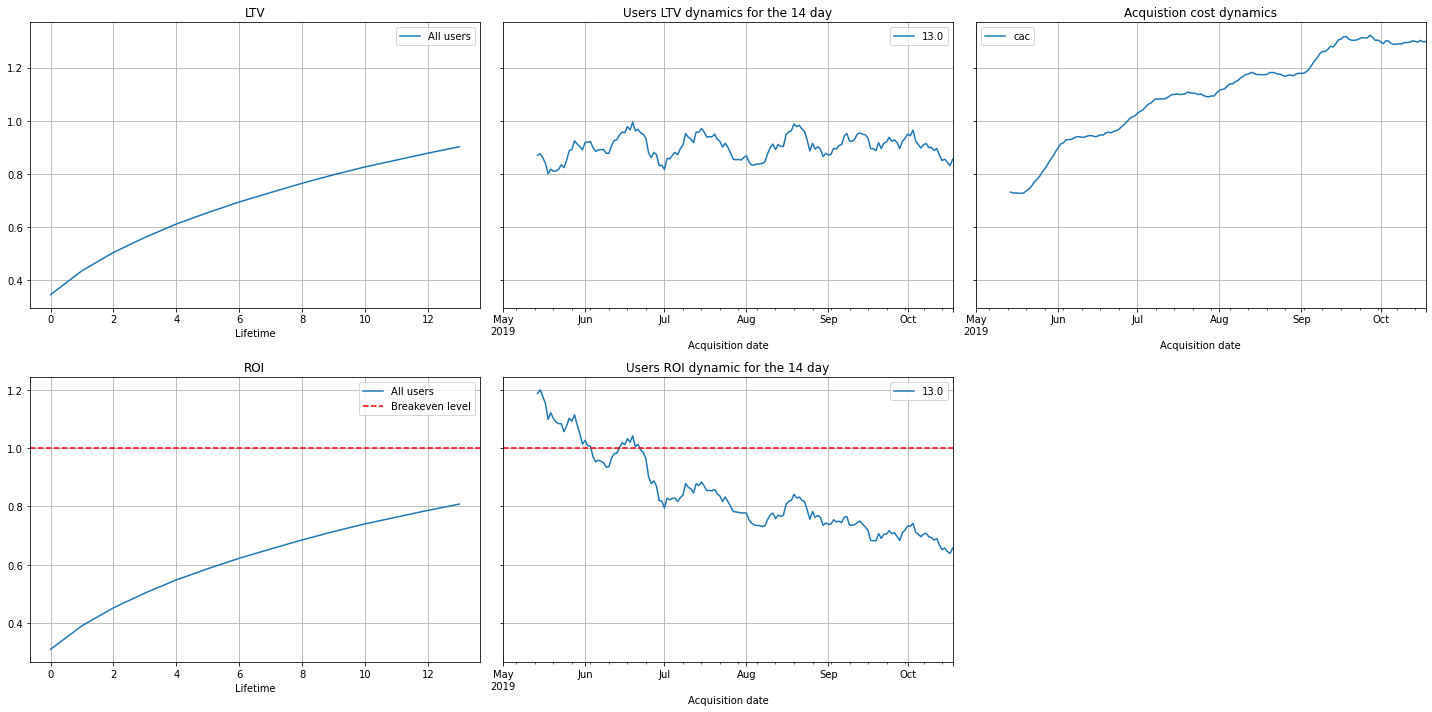

In [31]:
# calculating LTV and ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# building visualization
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

1. Advertising does not pay off. The ROI at the end of two weeks is slightly above 80%.
2. CAC increases all the time incrementally from month to month. Most likely, this is due to a consistent increase in the advertising budget for TipTop - out of the top 5 largest channels in terms of total spending, only spending on it has a similar dynamics with the general schedule.
3. LTV is affected by the seasonal factor, but this indicator is quite stable. So, it's not about the negative dynamic of quality of users.

To understand the reasons, we will go through all the available characteristics of users — the country, the source and the device of the first visit.

### Analysis of the return on advertisement costs by countries

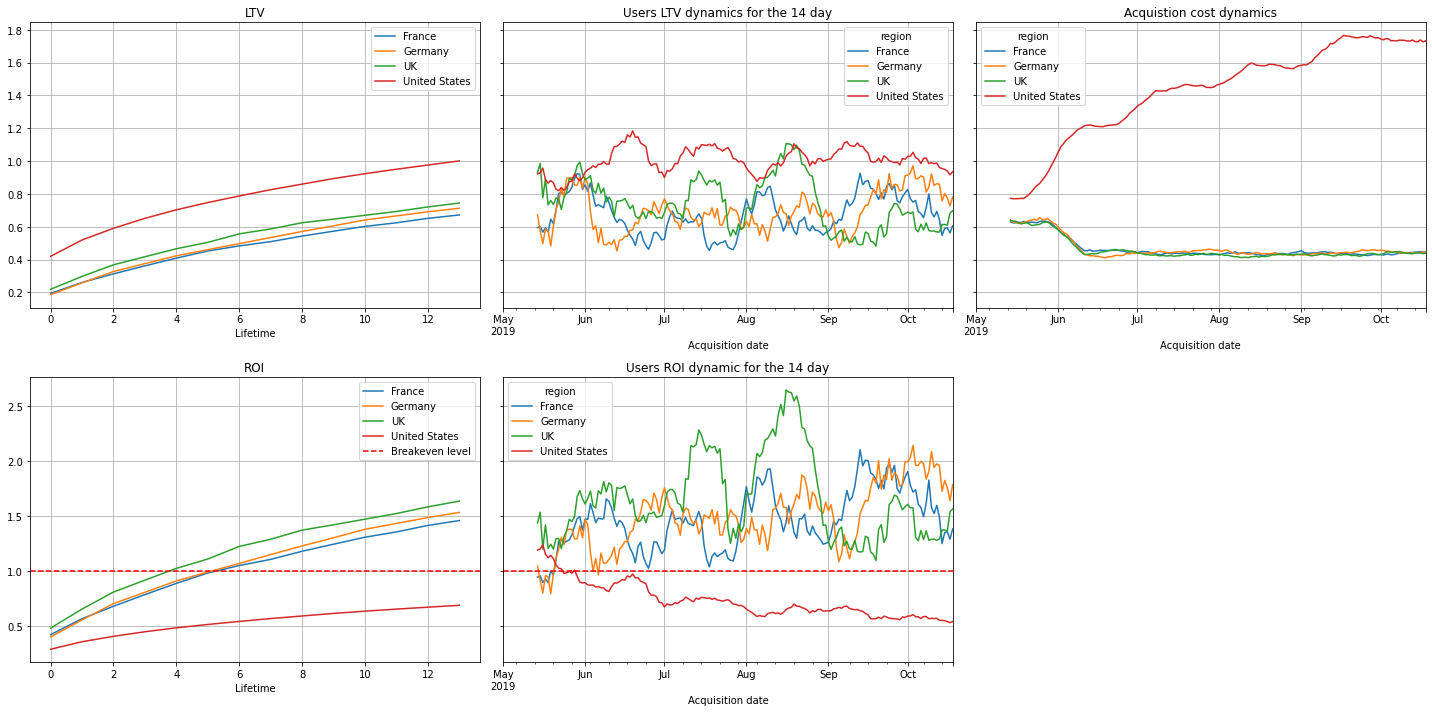

In [32]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

The breakdown by countries shows a clear problem with users from the US:

1. Of all countries, advertising does not pay off only in the US - at the end of two weeks, the ROI for this country is about 70%, while other countries are close to 150%.
2. The cost of attraction is stable for all countries except the USA, where this indicator is constantly growing and reaches a constant level only from mid-September 2019.
3. Users from the USA have the highest LTV. Then go Great Britain and Germany. Users from France bring the least revenue to the application.

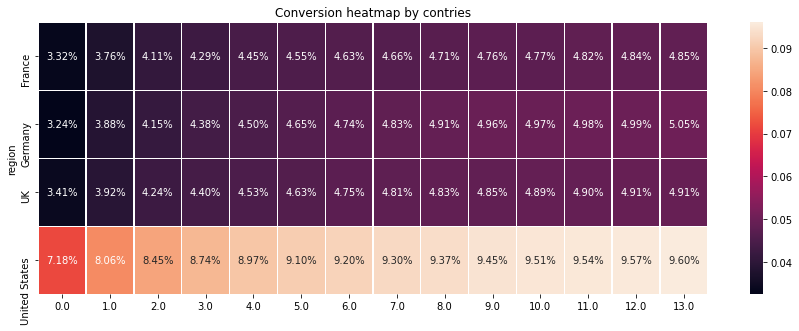

In [33]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

# creating heatmap by conversion table
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), linewidths=.3, annot=True, fmt='.2%')
plt.title('Conversion heatmap by contries')
plt.show() 

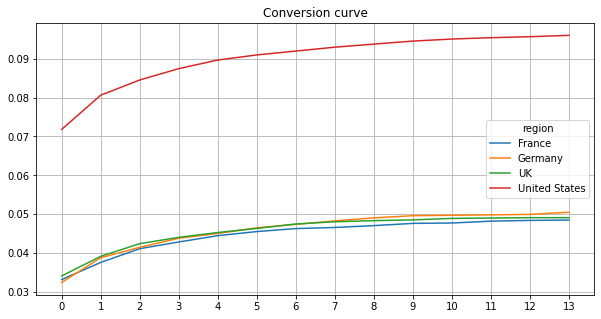

In [34]:
# creating conversion curve

report = conversion.drop(columns=['cohort_size'])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(10, 5))
plt.title('Conversion curve')
plt.show()

Throughout the entire horizon of the analysis, the conversion of users from the United States is about 2 times higher than the conversion of those from other countries, although this is the only region where advertising does not pay off.

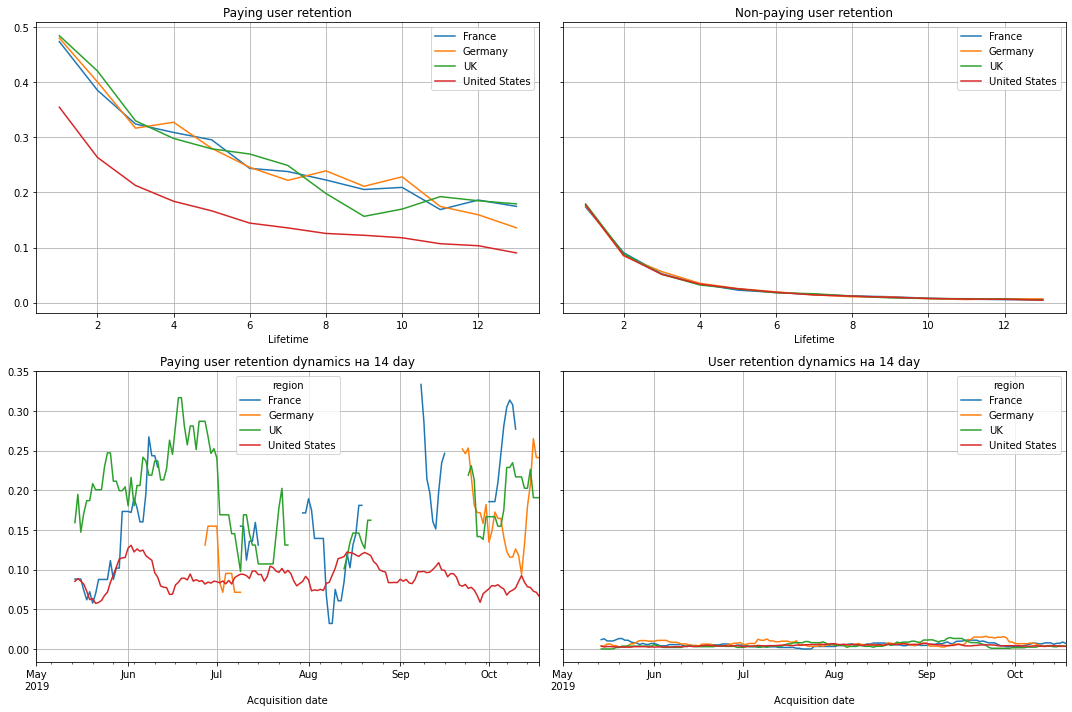

In [35]:
# buiding retention by countries

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Users from the USA are consistently poorly retained. Retention of users from the USA is about 10% lower than for other countries. 

### Analysis of the return on advertisement costs by countries by devices

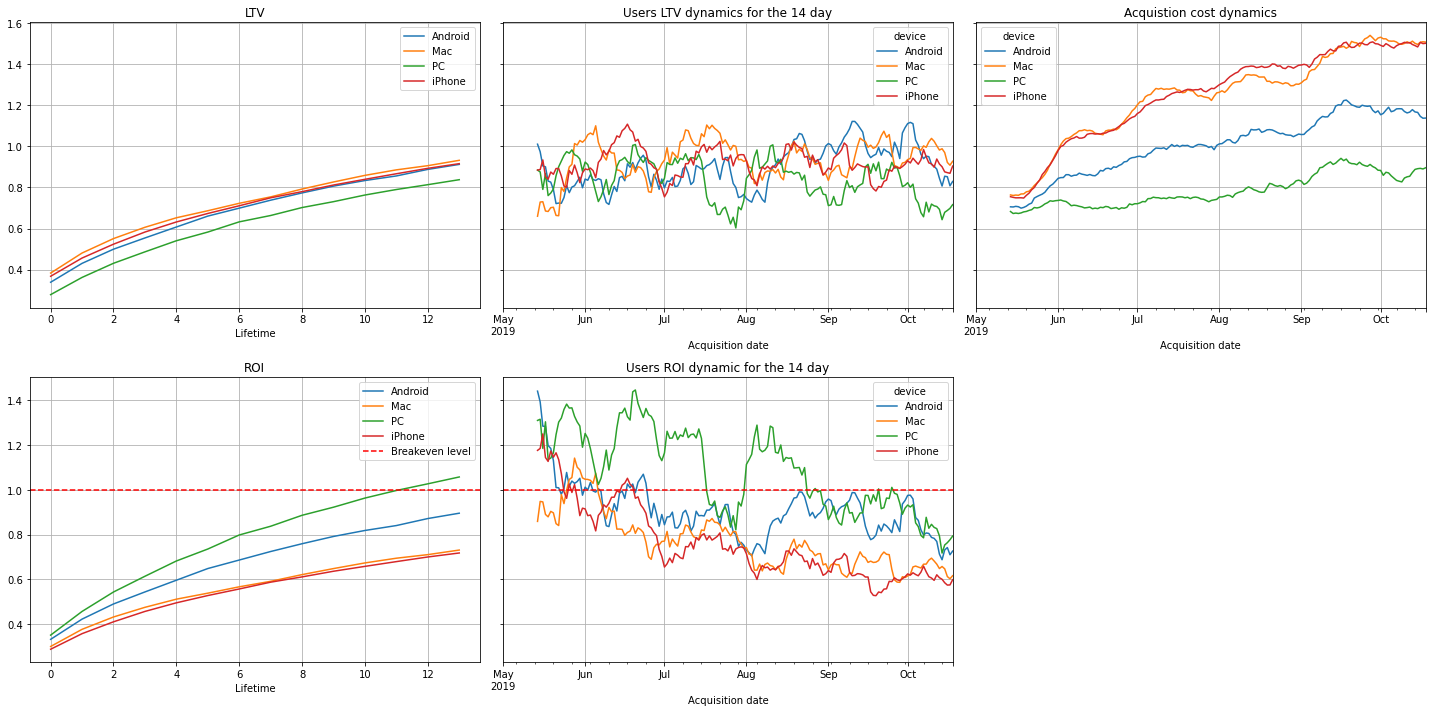

In [36]:
# return by device dimension

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

PC users are steadily paying off, Mac and Iphone - definitely not since July 2019. In May 2019, advertising budgets for users of all devices were approximately at the same level, but since June, the cost of attracting Mac and Iphone users has been growing equally. Users of Android mobile devices are also trending with them, and the budget for PC users has increased slightly. 

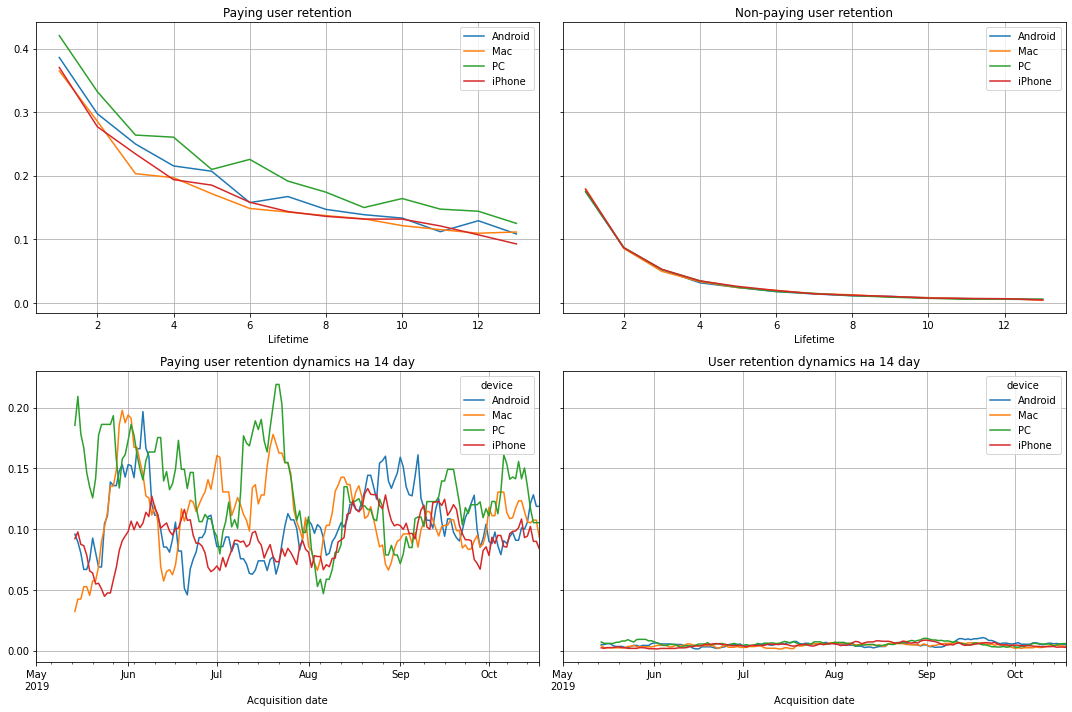

In [37]:
# retention by device dimension

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

The retention dynamics for users of all devices is approximately the same, for a PC it is even higher than other devices. It's probably all about conversion. Let's take a closer look at the retention of users through channels using a heat map.

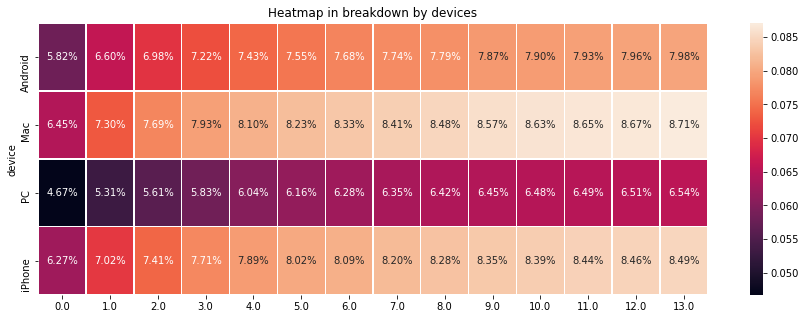

In [38]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

# creating heatmap by a conversion table
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), linewidths=.3, annot=True, fmt='.2%')
plt.title('Heatmap in breakdown by devices')
plt.show() 

The highest conversion rate is among Mac device users, the lowest is among PC users. Perhaps the current advertising companies are not optimized for this type of device.

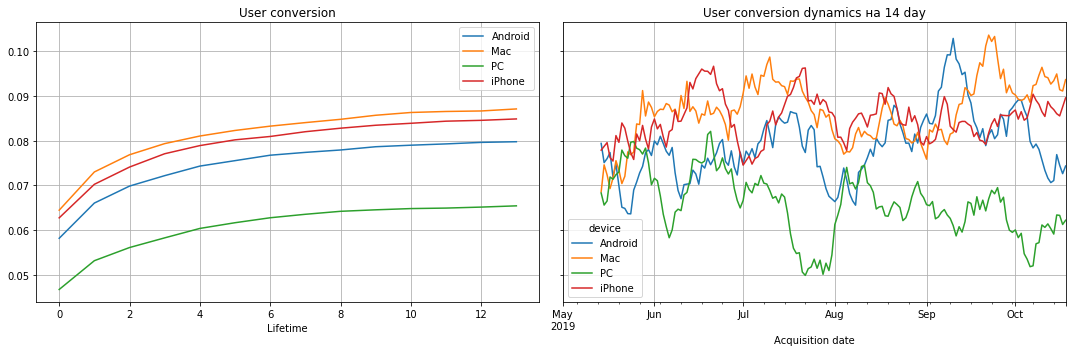

In [39]:
# conversion rate by devices

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

all users are converted approximately the same in dynamics, but the conversion rate for PC users is lower. The decline in the conversion rate of PC users attracted in the second half of July 2019 is particularly noticeable.

### Analysi of the return on advertising expences by channels

Let's check the sources of acquisition (channels). It is possible there is an unsuccessful advertising campaign in one channel.

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
AdNonSense,3687,1.007852,0.503134,0.586937,0.641997,0.680943,0.704041,0.729832,0.751318,0.764747,0.786240,0.799669,0.803967,0.812024,0.824110,0.834861
FaceBoom,27349,1.113434,0.525818,0.593079,0.628676,0.653784,0.670337,0.682136,0.695115,0.704197,0.710949,0.718521,0.723471,0.728879,0.733470,0.737075
LeapBob,8047,0.210026,0.507331,0.737646,0.973847,1.116758,1.233090,1.368912,1.493509,1.585635,1.754041,1.872142,1.981391,2.078831,2.167406,2.241219
MediaTornado,4148,0.219229,0.630004,0.878046,1.131576,1.345683,1.522477,1.681622,1.780395,1.917590,2.016385,2.115158,2.224916,2.329177,2.411487,2.445522
OppleCreativeMedia,8078,0.249845,0.389664,0.528141,0.689885,0.830829,0.969825,1.071195,1.167625,1.245757,1.322448,1.396626,1.466350,1.516294,1.590512,1.647378
RocketSuperAds,4225,0.418077,0.499543,0.764022,0.950472,1.091722,1.235236,1.362927,1.526833,1.639839,1.761931,1.884566,1.984007,2.063112,2.139953,2.224703
TipTop,18367,2.751718,0.124752,0.180959,0.227054,0.268904,0.306231,0.340199,0.368736,0.398834,0.426068,0.452986,0.476821,0.498503,0.519062,0.541120
WahooNetBanner,8029,0.601868,0.317879,0.484387,0.628568,0.736998,0.858236,0.946219,1.049549,1.125962,1.202798,1.269922,1.348607,1.409120,1.475215,1.523957
YRabbit,4077,0.217027,0.751418,0.978142,1.169888,1.392102,1.634717,1.781345,1.905416,2.018218,2.119731,2.209964,2.311476,2.413011,2.515653,2.577688


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3687,0.507084,0.591546,0.647038,0.686290,0.709569,0.735563,0.757217,0.770751,0.792414,0.805948,0.810279,0.818400,0.830580,0.841416
FaceBoom,27349,0.585464,0.660355,0.699989,0.727945,0.746376,0.759514,0.773965,0.784076,0.791595,0.800026,0.805537,0.811558,0.816670,0.820684
LeapBob,8047,0.106553,0.154925,0.204533,0.234548,0.258981,0.287507,0.313676,0.333025,0.368394,0.393199,0.416144,0.436609,0.455212,0.470715
MediaTornado,4148,0.138115,0.192493,0.248074,0.295012,0.333770,0.368660,0.390313,0.420391,0.442049,0.463703,0.487765,0.510622,0.528667,0.536128
OppleCreativeMedia,8078,0.097356,0.131953,0.172364,0.207579,0.242306,0.267633,0.291726,0.311247,0.330407,0.348940,0.366360,0.378839,0.397382,0.411590
RocketSuperAds,4225,0.208847,0.319420,0.397370,0.456424,0.516424,0.569808,0.638334,0.685579,0.736622,0.787893,0.829467,0.862540,0.894665,0.930097
TipTop,18367,0.343283,0.497948,0.624789,0.739948,0.842660,0.936131,1.014657,1.097478,1.172419,1.246489,1.312076,1.371739,1.428313,1.489010
WahooNetBanner,8029,0.191321,0.291537,0.378315,0.443576,0.516545,0.569499,0.631690,0.677681,0.723926,0.764326,0.811684,0.848104,0.887885,0.917221
YRabbit,4077,0.163078,0.212284,0.253897,0.302124,0.354778,0.386600,0.413527,0.438008,0.460039,0.479622,0.501653,0.523689,0.545965,0.559429


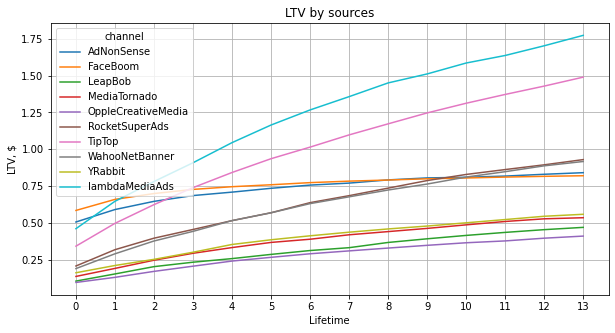

In [40]:
# calculating LTV and ROI

dimensions=['channel']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions
)

display(roi)  # ROI table

# LTV table
display(ltv)

# LTV curves
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV by sources')
plt.ylabel('LTV, $')
plt.xlabel('Lifetime')
plt.show()

Users came from TipTop and lambdaMediaAds bring the major part of revenue.

In [41]:
roi_history

cohort_size       cac       0.0       1.0  \
channel        dt                                                      
AdNonSense     2019-05-01           39  1.050000  0.243712  0.365568   
               2019-05-02           36  0.962500  0.000000  0.000000   
               2019-05-03           45  1.050000  0.211217  0.443598   
               2019-05-04           51  1.008824  0.484937  0.581924   
               2019-05-05           36  1.020833  0.841905  0.841905   
...                                ...       ...       ...       ...   
lambdaMediaAds 2019-10-14            8  0.700000  1.782143  1.782143   
               2019-10-15           12  0.733333  0.567045  1.134091   
               2019-10-16           11  0.727273  0.623750  0.623750   
               2019-10-17            3  0.800000  0.000000  0.000000   
               2019-10-18           11  0.727273  1.247500  1.247500   

                                2.0       3.0       4.0       5.0       6.0  \
channel        dt                                                             
AdNonSense     2019-05-01  0.365568  0.365568  0.487424  0.487424  0.487424   
               2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-05-03  0.443598  0.443598  0.443598  0.443598  0.443598   
               2019-05-04  0.581924  0.581924  0.581924  0.581924  0.581924   
               2019-05-05  0.841905  0.841905  0.841905  0.841905  0.841905   
...                             ...       ...       ...       ...       ...   
lambdaMediaAds 2019-10-14  2.673214  2.673214  2.673214  2.673214  3.564286   
               2019-10-15  1.701136  2.268182  2.835227  2.835227  3.402273   
               2019-10-16  0.623750  1.247500  1.247500  1.247500  1.247500   
               2019-10-17  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-18  1.247500  2.495000  2.495000  2.495000  2.495000   

                                7.0       8.0       9.0      10.0      11.0  \
channel        dt                                                             
AdNonSense     2019-05-01  0.487424  0.487424  0.487424  0.487424  0.487424   
               2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-05-03  0.443598  0.443598  0.443598  0.443598  0.549206   
               2019-05-04  0.581924  0.581924  0.581924  0.581924  0.581924   
               2019-05-05  0.841905  0.841905  0.841905  0.841905  0.841905   
...                             ...       ...       ...       ...       ...   
lambdaMediaAds 2019-10-14  3.564286  3.564286  4.455357  4.455357  5.346429   
               2019-10-15  3.402273  3.402273  3.402273  3.969318  3.969318   
               2019-10-16  1.247500  1.247500  1.247500  1.247500  1.247500   
               2019-10-17  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-18  3.118750  3.742500  3.742500  4.366250  4.990000   

                               12.0      13.0  
channel        dt                              
AdNonSense     2019-05-01  0.487424  0.487424  
               2019-05-02  0.000000  0.000000  
               2019-05-03  0.549206  0.549206  
               2019-05-04  0.581924  0.581924  
               2019-05-05  0.977687  0.977687  
...                             ...       ...  
lambdaMediaAds 2019-10-14  5.346429  6.237500  
               2019-10-15  3.969318  5.103409  
               2019-10-16  1.247500  1.247500  
               2019-10-17  0.000000  0.000000  
               2019-10-18  4.990000  5.613750  

[1710 rows x 16 columns]

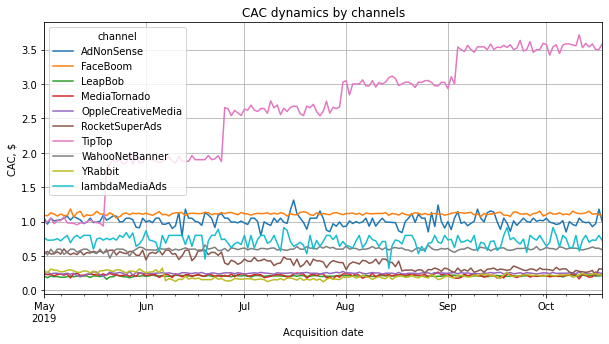

In [42]:
# building the visualization of CAC changing history

roi_history.pivot_table(
    index='dt', columns='channel', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))

plt.ylabel('CAC, $')
plt.xlabel('Acquisition date')
plt.title('САС dynamics by channels')
plt.show()

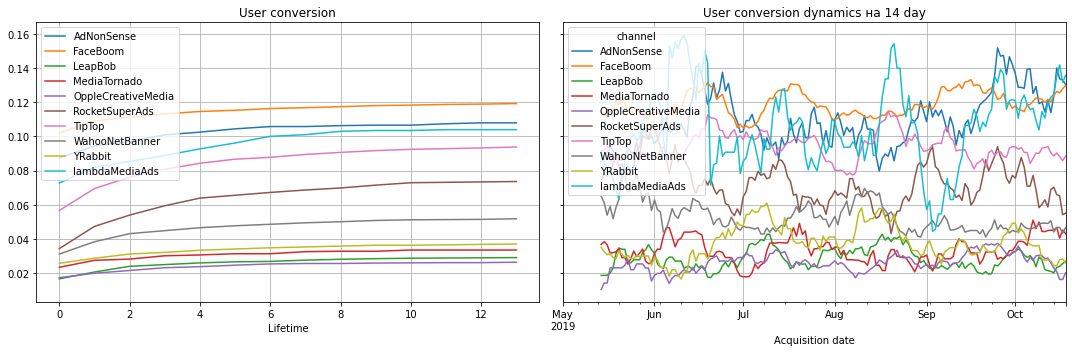

In [43]:
# conversion by advert. channels

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

It seems that some experiments have been carried out with advertising companies on the 'lambda Media Ads' channel - the conversion of users on the 14th day is constantly changing throughout the year.

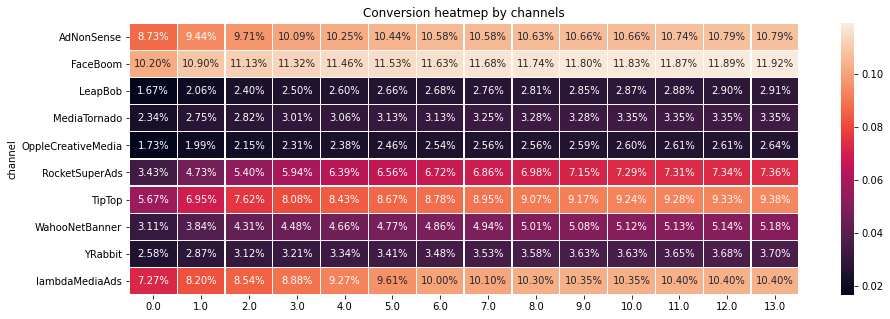

In [44]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions
)

# creating heatmap according to conversion table
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), linewidths=.3, annot=True, fmt='.2%')
plt.title('Conversion heatmep by channels')
plt.show() 

We can single out the most inefficient channels in terms of user conversion: OppleCreativeMedia, MediaTornade, LeapBob, YRabbit. The conversion rate for the TipTop channel, which is the most expensive in terms of the cost of attracting a user, is lower than for the Ad Non Sense and FaceBoom, lambdaMediaAd channels, where the user's advertising budget is approximately the same.

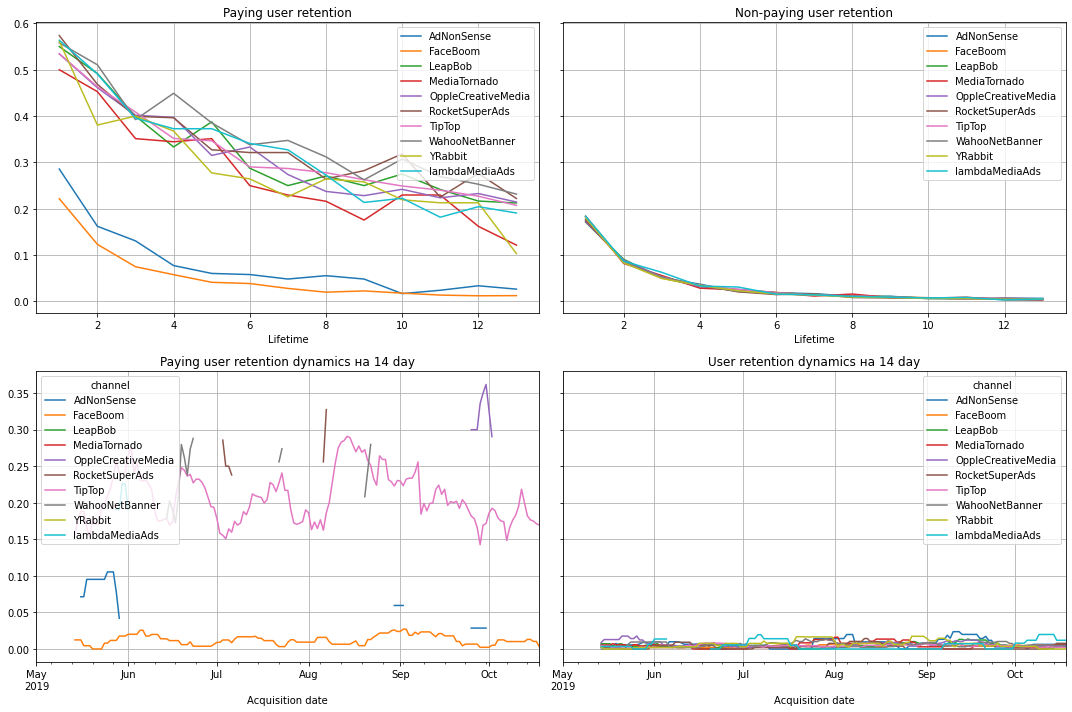

In [45]:
# visualizing of retention by advertising channels

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions
)

plot_retention(retention_grouped, retention_history, 14) 

Users from AdNonSense and FaceBoom show worse retention than others. 

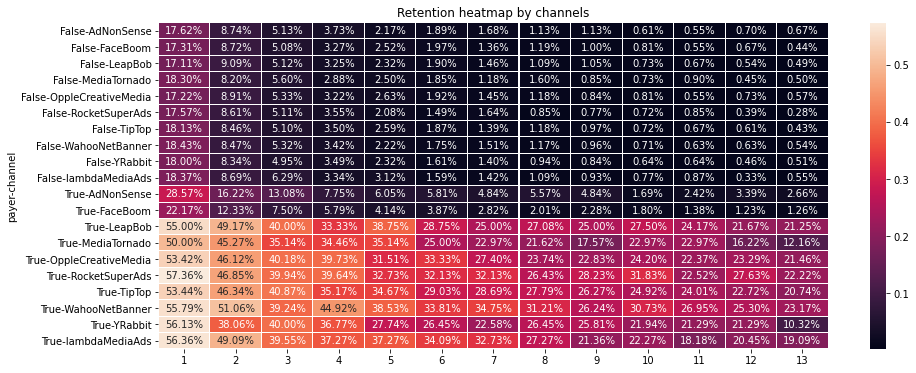

In [46]:
# building heatmap for retention by channels

plt.figure(figsize=(15, 6))
sns.heatmap(retention_grouped.drop(columns=['cohort_size', 0]), linewidths=.015, annot=True, fmt='.2%')
plt.title('Retention heatmap by channels')
plt.show()

For all paying users, the retention on the first day is about 50% and above, except for users who came through AdNonSense and FaceBoom. For these channels the retention on the first day does not reach even 30%.

### Conclusion

The most paying users come from the USA, however, this is the only region where advertising does not pay off due to poor user retention. Perhaps the quality of advertising companies used in these markets suffers. Let's see which advertising channels users from the USA come from:

In [47]:
profiles_us = profiles.query('region == "United States"')

with pd.option_context('display.float_format', '{:.2}'.format):
    display(
    profiles_us.groupby('channel')
    .agg({'payer':'count'})
    .sort_values(by='payer', ascending=False)
)

,payer
channel,
FaceBoom,29144
TipTop,19561
RocketSuperAds,4448
MediaTornado,4364
YRabbit,4312


It all fits together: the bulk of users come through the Facebook channel, which has the worst retention rate and through the TipTop channel, which is the most expensive.

## Conclusion

### The reasons of inefficient acquisition campaign

- The low retention for the users from the US, which are the most siginificant part of the paying customers

- The major channels for acquiring US users are FaceBoom and TipTop. Faceboom gives the users with the lowest retention meanwhile TipTop gives the most expensive users.

### The recomendations to the marketing department to increase effiecincy

Based on the results of the analysis, the following recommendations can be given for the marketing department:

- review the advertising strategy for AdNonSense and FaceBoom channels, possibly abandon them as channels that bring the most "leaked" users

- work on retaining users from the USA. It is possible to attract users of these countries through advertising channels with a lower conversion rate, but a better audience for our application, for example, TipTop. Users from the USA paid off for the last time in May 2019 - it's worth seeing what the advertising companies were in this month

- ask testers to check the effectiveness of the application on Apple and Android devices

- inform the product manager about the general situation with user retention - you can attract users indefinitely, but there are much more growth points in user retention. Perhaps new features should be added to the application for greater user engagement

- introduce interim control of the results of the marketing department, pay more attention to metrics.